## **Ground-truth masks generator**
Author : *Kélian Sommer*<br>
This notebook aims to generate binary masks to identify ground-truths cloud areas in the images.
Default image resolution of 640x512 is too large to process. Need to bin them in 4x4, i.e. 160x128.

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import *

import sys
sys.path.append('../utilities')
from utilities import *
from mask_generator import *

import multiprocessing
num_cores = multiprocessing.cpu_count()
from joblib import parallel_backend, Parallel, delayed
from dask.distributed import Client
client = Client()

import glob
import random
random.seed(a=10)

%matplotlib widget

#### **Open FITS image with astropy**

In [2]:
image = fits.getdata('fits_samples/cloud_sky_sample.fits')

#### **Plot image in raw ADU**

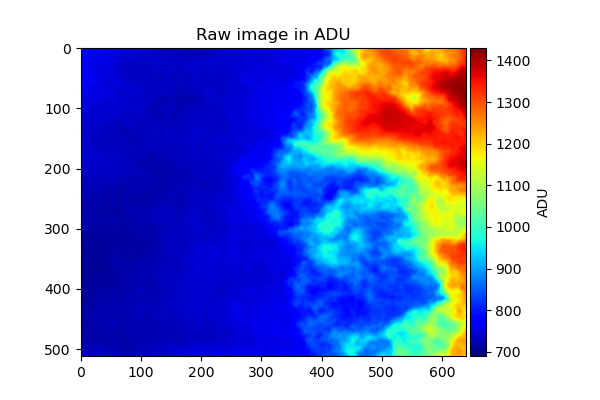

In [3]:
plt.figure(figsize=(6,4))
plt.title('Raw image in ADU')
plt.imshow(image, cmap='jet')
plt.colorbar(label='ADU', pad=0.01)
plt.show()

#### **Create ground truth binary mask**

Found automatic threshold t = 0.912109375.


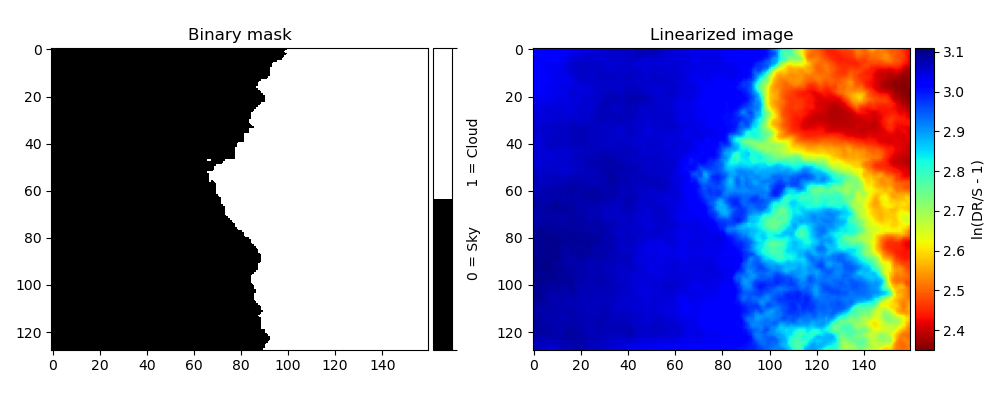

In [4]:
generate_mask(filename='fits_samples/cloud_sky_sample.fits', bin_size = (128, 160) , a_log = 100000, contrast = 0.9, display = True, return_mask = False, write_to_fits = False)

#### **Snippet dataset of cloud images and create mask for them**

In [12]:
dataset_directory = ''
images_list = glob.glob(dataset_directory+'/*.fits')

In [14]:
with parallel_backend('threading', n_jobs=num_cores):
    l_plots = Parallel(verbose=5)(delayed(generate_mask)(filename = filename,
    bin_size=(128, 160), a_log = 100000, contrast = 0.9, display = False, return_mask = False, write_to_fits = True) for filename in images_list)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.5s
[Para